In [1]:
import numpy as np
from matplotlib import pyplot as plt

## Exemplo de um Neurônio Artificial

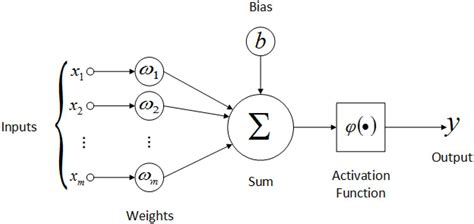

In [2]:
def sigmoid(x):
    return 1.0 / (1 + np.exp(-x))

In [3]:
x = np.linspace(-5.0, 5.0, 100)
y = sigmoid(x)

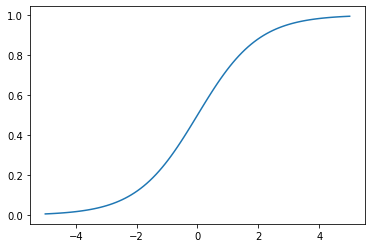

In [4]:
plt.plot(x,y)

In [5]:
class Neuron:
    def __init__(self, input_size=5):
        self.w = np.random.random(input_size)
        self.b = np.random.random()
    def compute(self, inputs):
        s = np.dot(self.w, inputs) + self.b
        z = sigmoid(s)
        return z

In [6]:
n = Neuron()
n.compute([1,2,3,4,5])

0.9957820687783051

In [7]:
def tanh(x):
    return np.tanh(x)

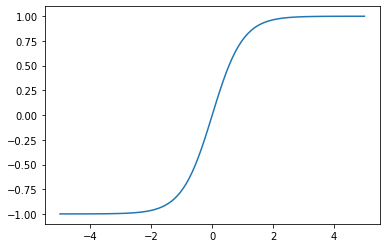

In [9]:
y = tanh(x)
plt.plot(x,y)

In [10]:

class Neuron2:
    def __init__(self, input_size=3):
        self.w = np.array([-1,0,1])
        self.b = -0.5
    def compute(self, inputs):
        s = np.dot(self.w,inputs) + self.b
        z = tanh(s)
        return z

In [11]:
n2 = Neuron2()
n2.compute([1,2,3])

0.9051482536448664

## Exemplo de treinamento com Backpropagation utilizando o dataset Iris

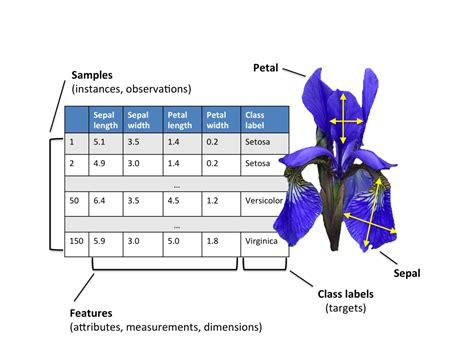

In [ ]:
# Leitura do dataset 
!gdown --id "1d3NbjXro_BfnYpFm66ETBfe7ubAZPAoL"
f = open('Iris.csv',)
d0 = f.readlines()

# Tratamento dos dados
d0 = d0[1:]
total = len(d0)

d1 = [i.replace('\n','') for i in d0]

d2 = [i.split(',') for i in d1]

import numpy as np
d3 = np.array(d2)
d3 = d3[:,1:5].astype(np.float64)

# One hot encoding
def one_hot(y):
    labels = np.unique(y)
    one_hot = np.array([i == labels for i in y])
    return one_hot.astype(np.float64)

y = np.array(d2)
y = y[:,-1]

d4 = one_hot(y) 

d5 = np.zeros_like(d3)
for i in range(d3.shape[1]):
    d5[:,i] = (d3[:,i] - d3[:,i].min()) / (d3[:,i].max() - d3[:,i].min()) 

indices = np.random.randint(0,149,150)
x = d5[indices] 
y = d4[indices]

# Divisão dos dados 
train = int(150*0.9)

x_train = x[:train]
y_train = y[:train]

x_test = x[train:]
y_test = y[train:]

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1d3NbjXro_BfnYpFm66ETBfe7ubAZPAoL
To: /content/Iris.csv
100% 5.11k/5.11k [00:00<00:00, 6.94MB/s]


In [ ]:
print(x_train.shape)

(135, 4)


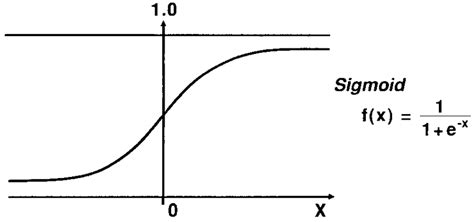

In [ ]:
def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))

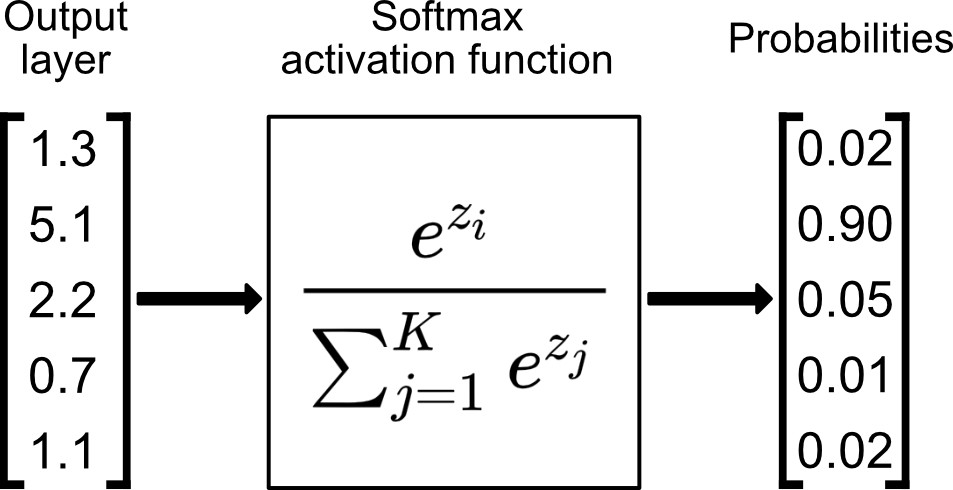

In [ ]:
def softmax(x):
    ex = np.exp(x)
    s = np.sum(ex)
    return ex/s

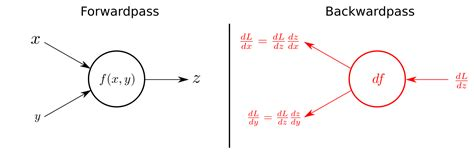

In [ ]:
class Perceptron:
    def __init__(self):

        # Camamda de entrada com 4 neurônios de entrada
        self.Wh = np.random.random((5,4))*2.0 - 1.0
        self.bh = np.random.random((5,1))*2.0 - 1.0

        # Camamda escondida com 5 neurônios 
        self.Wh2 = np.random.random((4,5))*2.0 - 1.0
        self.bh2 = np.random.random((4,1))*2.0 - 1.0

        # Camamda de saída com 3 neurônios de saída
        self.Wo = np.random.random((3,4))*2.0 - 1.0
        self.bo = np.random.random((3,1))*2.0 - 1.0

        self.eta = 0.1

    def forward(self,x):

        x = np.reshape(x,(4,1))

        self.sh = np.dot(self.Wh,x) + self.bh

        self.zh = sigmoid(self.sh)

        self.sh2 = np.dot(self.Wh2,self.zh) + self.bh2

        self.zh2 = sigmoid(self.sh2)

        self.so = np.dot(self.Wo,self.zh2) + self.bo

        self.zo = softmax(self.so)
        return self.zo

    def train(self, X, Y):

        Err = 0.0

        total = X.shape[0]

        for i in range(total):
            x = X[i,:]
            x = np.reshape(x,(4,1))

            y_hat = Y[i,:]
            y_hat = np.reshape(y_hat,(3,1))
            
            # Forward pass
            y = self.forward(x)

            # Calculo do erro
            err = - np.sum(y_hat*np.log(y))
            Err = Err + err

            # Backpropagation
            # Derivada do erro
            self.do = (y - y_hat)

            #Derivada da segunda camada
            self.dh2 = np.dot(self.Wo.T, self.do) \
                    * self.zh2 * (1.0 - self.zh2)

            #Derivada da primeira camada
            self.dh = np.dot(self.Wh2.T, self.dh2) \
                    * self.zh * (1.0 - self.zh)
            
            #Atualização dos pesos e biases
            self.Wo = self.Wo - self.eta * np.dot(self.do,self.zh2.T)
            self.bo = self.bo - self.eta * self.do

            self.Wh2 = self.Wh2 - self.eta * np.dot(self.dh2,self.zh.T)
            self.bh2 = self.bh2 - self.eta * self.dh2

            self.Wh = self.Wh - self.eta * np.dot(self.dh,x.T)
            self.bh = self.bh - self.eta * self.dh

        Err = Err / total
        return Err

In [ ]:
#Loop de treino
p = Perceptron()
erro = []
for i in range(10001):
    Err = p.train(x_train,y_train)
    erro.append(Err)
    if not (i % 1000) or i == 0:
        print('Err = ',Err)

Err =  1.153654653478242
Err =  0.04810348122530135
Err =  0.03206039458734858
Err =  0.029005340990751898
Err =  0.028006775002541836
Err =  0.02741110618535381
Err =  0.02698810151540726
Err =  0.026713496256668603
Err =  0.026536901433926955
Err =  0.02641855117255402
Err =  0.026334714116371626


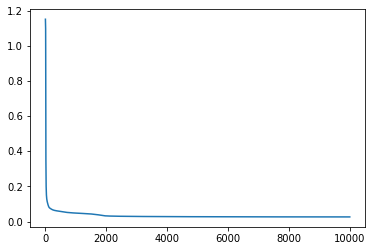

In [ ]:
import matplotlib.pyplot as plt

y = np.arange(len(erro))

plt.plot(y,erro)

In [ ]:
np.set_printoptions(formatter={'float':lambda x: '%+01.2f ' % x})

for i in range(x_test.shape[0]):
    y = p.forward(x_test[i])
    print(y.T[0], y_test[i])

[+0.00  +0.00  +1.00 ] [+0.00  +0.00  +1.00 ]
[+0.00  +0.00  +1.00 ] [+0.00  +0.00  +1.00 ]
[+1.00  +0.00  +0.00 ] [+1.00  +0.00  +0.00 ]
[+0.00  +1.00  +0.00 ] [+0.00  +1.00  +0.00 ]
[+0.00  +0.00  +1.00 ] [+0.00  +0.00  +1.00 ]
[+1.00  +0.00  +0.00 ] [+1.00  +0.00  +0.00 ]
[+1.00  +0.00  +0.00 ] [+1.00  +0.00  +0.00 ]
[+0.00  +1.00  +0.00 ] [+0.00  +1.00  +0.00 ]
[+0.00  +1.00  +0.00 ] [+0.00  +1.00  +0.00 ]
[+0.00  +0.00  +1.00 ] [+0.00  +0.00  +1.00 ]
[+0.00  +1.00  +0.00 ] [+0.00  +1.00  +0.00 ]
[+0.00  +0.11  +0.89 ] [+0.00  +1.00  +0.00 ]
[+0.00  +0.00  +1.00 ] [+0.00  +0.00  +1.00 ]
[+0.00  +1.00  +0.00 ] [+0.00  +1.00  +0.00 ]
[+1.00  +0.00  +0.00 ] [+1.00  +0.00  +0.00 ]
